<a href="https://colab.research.google.com/github/luchia0602/OOP/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%B2%D1%88%D1%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорты

In [1]:
!python -m pip install torch torchvision torchaudio
!python -m pip install sentence_transformers transformers accelerate -U
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
model_s = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embed = model_s.encode

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
import statistics
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

In [3]:
# библиотека с переводчиком bing
!pip install --upgrade translators
import translators as ts

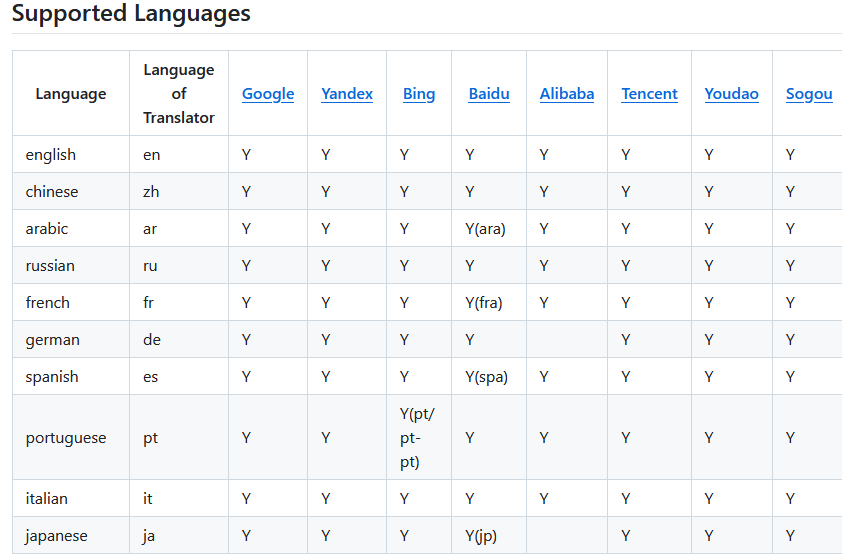

In [4]:
# модель с huggingface
from transformers import AutoTokenizer, M2M100ForConditionalGeneration
model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
tokenizer = AutoTokenizer.from_pretrained("facebook/m2m100_418M")

In [5]:
# код для данных на 300 примеров
import torch

In [6]:
model.to("cuda");

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [8]:
model.device

device(type='cuda', index=0)

In [9]:
import statistics

In [10]:
!pip install pandas
import pandas as pd

In [11]:
# библиотека для google translate
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

In [12]:
import numpy as np

In [39]:
text_to_translate = "Life is like a box of chocolates"
model_inputs = tokenizer(text_to_translate, return_tensors="pt")
model_inputs

{'input_ids': tensor([[128036,  21457,    117,  14906,      8,  37089,    432, 110309,  10550,
              2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [40]:
# тест с huggingface
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
hi_text = "जीवन एक चॉकलेट बॉक्स की तरह है।"
tokenizer.src_lang = "hi"
encoded_hi = tokenizer(hi_text, return_tensors="pt")
generated_tokens = model.generate(**{k: v.to(model.device) for k, v in encoded_hi.items()}, forced_bos_token_id=tokenizer.get_lang_id("fr"))
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

['La vie est comme une boîte de chocolat.']

In [16]:
# тест google translate
text = 'おはようございます。今日は晴れです。'
translator = Translator()
translated = translator.translate(text)
print(translated)
print(translated.text)

Translated(src=ja, dest=en, text=good morning. It's sunny today., pronunciation=[[]], extra_data="{'translat...")
good morning. It's sunny today.


In [17]:
# тест библиотеки translators
q_text = 'The cat’s tail twitched and its eyes narrowed.'
correct = '猫はしっぽをピクッとさせて、目を細めた。'
bing_trans = ts.translate_text(query_text=q_text, translator='bing', from_language='en', to_language='ja')
print(f'bing: {bing_trans}')

bing: 猫の尻尾がぴくぴくと動き、目が細くなった。


In [18]:
yandex_trans = ts.translate_text(query_text='hello', translator='yandex', from_language='en', to_language='ru')
print(yandex_trans)

здравствуйте


In [19]:
# тест эмбеддинга
bing_trans_emb = embed(bing_trans)
correct_emb = embed(correct)

In [20]:
cosine_distances(correct_emb.reshape(1, -1), bing_trans_emb.reshape(1, -1))

array([[0.23214483]], dtype=float32)

In [21]:
# старый класс без наследования, работает для google
class Best_translator:
 def __init__(self, text, correct_translation, translator_name, src, dest):
  self.text = text
  self.correct_translation = correct_translation
  self.translator_name = translator_name
  self.src = src
  self.dest = dest

 def translate(self):
  if 'translator_name' == 'google':
    if len(self.text) > 1:
      return translate(self.text, self.dest)
  else:
    return ts.translate_text(query_text=self.text, translator=self.translator_name, from_language=self.src, to_language=self.dest)


 def evaluate(self):
  translation = self.translate()
  correct_emb = embed(self.correct_translation)
  translation_emb = embed(translation)
  array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
  number = array[0][0]
  #return(translator_name, number, translation)
  return(number)

In [22]:
df = pd.read_excel('project.xlsx')
df
# наши данные

,ja,eng
0,奥さんの方はやせて、金髪で、なんと首の長さが普通の人の二倍はある。,Mrs Dursley was thin and blonde and had nearly...
1,八時半、ダーズリー氏は鞄を持ち、奥さんの頬にちょこっとキスして、それからダドリー坊やにもバイ...,"At half past eight, Mr. Dursley picked up his ..."
2,坊やがかんしゃくを起こして、コーンフレークを皿ごと壁に投げつけている最中だったからだ。,because Dudley was now having a tantrum and th...
3,「わんぱく坊主め」ダーズリー氏は満足げに笑いながら家を出て、自家用車に乗りこみ、四番地の路地...,chortled Mr Dursley as he left the house. He g...
4,ダーズリー氏は瞬きをして、もう一度猫をよく見なおした。,Mr Dursley blinked and stared at the cat.
...,...,...
297,不意を食らってハリーはコンクリートの床にひっくり返った,"Caught by surprise, Harry fell hard on the co..."
298,館内にいた客たちは叫び声を上げ、出口に向かってかけ出した,"The great snake was uncoiling itself rapidly, ..."
299,おばさんは、知っている人なのかと激しくハリーを問いつめ、何も買わずに二人を連れて店を飛び出した。,After asking Harry furiously if he knew the ma...
300,一度はバスの中で、緑ずくめのとっぴな格好をしたおばあさんがハリーに向かってうれしそうに手を振った,A wild-looking old woman dressed all in green ...


Как работает

In [23]:
correct_emb = embed('黒い髪をひこつめて、小さな髷にしている')

In [24]:
# bing
print(ts.translate_text(query_text='Her black hair was drawn into a tight bun.', translator_name='bing', from_language='en', to_language='ja'))
translation_emb = embed(ts.translate_text(query_text='Her black hair was drawn into a tight bun.', translator_name='bing', from_language='en', to_language='ja'))
array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
number = array[0][0]
print(number)

彼女の黒髪はきつく束ねられていました。
0.41364503


In [25]:
# google
text = 'Her black hair was drawn into a tight bun.'
translator = Translator()
print(translator.translate(text, 'ja'))
print(translator.translate(text, 'ja').text)
translation_emb = embed(translator.translate(text, 'ja').text)
array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
number = array[0][0]
print(number)

Translated(src=en, dest=ja, text=彼女の黒髪はタイトなお団子にまとめられていた。, pronunciation=Kanojo no kurokami wa taitona o dango ni matome rarete ita., extra_data="{'translat...")
彼女の黒髪はタイトなお団子にまとめられていた。
0.37002355


In [26]:
#M2M100
encoded_hi = tokenizer('Her black hair was drawn into a tight bun.', return_tensors="pt")
generated_tokens = model.generate(**{k: v.to(model.device) for k, v in encoded_hi.items()}, forced_bos_token_id=tokenizer.get_lang_id("ja"))
print(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
translation_emb = embed(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
number = array[0][0]
print(number)

['彼女の黒い髪の毛は、緊密なバンに描かれていました。']
0.47417712


In [27]:
# correct
translation_emb = embed('黒い髪をひこつめて、小さな髷にしている')
array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
number = array[0][0]
print(number)

0.0


Класс с наследованием

In [28]:
class Ultra_Translator:
  def __init__(self, text, correct_translation, translator_name, src):
    self.text = text
    self.correct_translation = correct_translation
    self.translator_name = translator_name
    self.src = src

  def translate(self, text, translator_name, src):
    try:
      if translator_name == 'bing':
        return BingTranslator(self.text, self.correct_translation, self.translator_name, self.src).custom_translate(self.text, self.translator_name, self.src)
      if translator_name == 'google':
        return GoogleTranslator(self.text, self.correct_translation, self.translator_name, self.src).custom_translate(self.text, self.translator_name, self.src)
      if translator_name == 'M2M100':
        return M2M100Translator(self.text, self.correct_translation, self.translator_name, self.src).custom_translate(self.text, self.translator_name, self.src)
    except:
      return ('try another translator')

  def evaluate(self):
    translation = self.translate(self.text, self.translator_name, self.src)
    correct_emb = embed(self.correct_translation)
    translation_emb = embed(translation)
    array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
    return array[0][0]

class BingTranslator(Ultra_Translator):
  def custom_translate(self, text, translator_name, src):
    return ts.translate_text(query_text=self.text, translator=self.translator_name, from_language=self.src, to_language='ja')

class GoogleTranslator(Ultra_Translator):
  def custom_translate(self, text, translator_name, src):
    return translator.translate(text, 'ja').text

class M2M100Translator(Ultra_Translator):
  def custom_translate(self, text, translator_name, src):
    encoded_hi = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(**{k: v.to(model.device) for k, v in encoded_hi.items()}, forced_bos_token_id=tokenizer.get_lang_id("ja"))
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

def mean(translator_name):
  results = []
  for index, row in df.iterrows():
    translator = Ultra_Translator(row['eng'], row['ja'], translator_name, 'en')
    results.append(translator.evaluate())
  return statistics.mean(results)

In [29]:
%%time
print(mean('bing'))

0.22164746
CPU times: user 12 s, sys: 143 ms, total: 12.2 s
Wall time: 2min 14s


In [30]:
%%time
print(mean('google'))

0.2186609
CPU times: user 11.9 s, sys: 227 ms, total: 12.1 s
Wall time: 43.2 s


In [31]:
%%time
print(mean('M2M100'))

0.48065284
CPU times: user 4min 18s, sys: 541 ms, total: 4min 19s
Wall time: 4min 21s


Юнит-тест

In [32]:
import unittest
from unittest.mock import patch

class TestUltraTranslator(unittest.TestCase):

    def setUp(self):
        print('setting up an object')
        self.df = pd.DataFrame({
            'eng': ['Hello', 'Good morning', 'How are you?'],
            'ja': ['こんにちは', 'おはようございます', 'お元気ですか？']
        })
        self.test_text = 'Hello'
        self.test_correct_translation = 'こんにちは'
        self.test_translator_name = 'bing'
        self.test_src = 'en'

    @classmethod

    def test_translate_incorrect_translation(self):
        bing_translator = BingTranslator(self.test_text, self.test_correct_translation, self.test_translator_name, self.test_src)
        self.assertEqual(bing_translator.custom_translate(self.test_text, self.test_translator_name, self.test_src), '面倒くさい')

    def test_translate_incorrect_dest(self):
        bing_translator = BingTranslator(self.test_text, self.test_correct_translation, self.test_translator_name, self.test_src, 'fr')
        self.assertEqual(bing_translator.custom_translate(self.test_text, self.test_translator_name, self.test_src, 'fr'), 'こんにちは')

    def test_translate_incorrect_translator(self):
        bing_translator = BingTranslator(self.test_text, self.test_correct_translation, 'baidu', self.test_src)
        self.assertEqual(bing_translator.custom_translate(self.test_text, 'baidu', self.test_src), 'こんにちは')

    def test_translate_incorrect_source(self):
        bing_translator = BingTranslator(self.test_text, self.test_correct_translation, self.test_translator_name, 'de')
        self.assertEqual(bing_translator.custom_translate(self.test_text, self.test_translator_name, 'de'), 'こんにちは')

    def test_mean(self):
        self.assertTrue(-1 <= mean(self.test_translator_name) <= 1)

In [33]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_mean (__main__.TestUltraTranslator) ... 

setting up an object


ok
test_translate_incorrect_dest (__main__.TestUltraTranslator) ... ERROR
test_translate_incorrect_source (__main__.TestUltraTranslator) ... ok
test_translate_incorrect_translation (__main__.TestUltraTranslator) ... ERROR
test_translate_incorrect_translator (__main__.TestUltraTranslator) ... 

setting up an object
setting up an object
setting up an object
setting up an object


ERROR

ERROR: test_translate_incorrect_dest (__main__.TestUltraTranslator)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-32-63478918850d>", line 24, in test_translate_incorrect_dest
    bing_translator = BingTranslator(self.test_text, self.test_correct_translation, self.test_translator_name, self.test_src, 'fr')
TypeError: Ultra_Translator.__init__() takes 5 positional arguments but 6 were given

ERROR: test_translate_incorrect_translation (__main__.TestUltraTranslator)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-32-63478918850d>", line 20, in test_translate_incorrect_translation
    bing_translator = BingTranslator(self.test_text, self.test_correct_translation, self.test_translator_name, self.test_src)
AttributeError: type object 'TestUltraTranslator' has no attribute 'test_text'

ERROR: test_translate_incorrect_transla

In [34]:
# демонстрация с неправильным source
print(ts.translate_text(query_text='Hello', translator='bing', from_language='de', to_language='ja'))
print(ts.translate_text(query_text='Hello', translator='bing', from_language='fr', to_language='ja'))
print(ts.translate_text(query_text='Hello', translator='bing', from_language='ru', to_language='ja'))

こんにちは
こんにちは
こんにちは


С Фасадом

In [35]:
class BaseTranslationEngine: # абстрактный класс
  def translate(self, text: str, translator_name: str, src: str) -> str:
    raise NotImplementedError("что-то пошло не так")

class BingTranslationEngine(BaseTranslationEngine): # наследующийся класс для bing
  def translate(self, text: str, translator_name: str, src: str) -> str:
    return ts.translate_text(query_text=text, translator_name='bing', from_language=src, to_language='ja')

class GoogleTranslationEngine(BaseTranslationEngine): # наследующийся класс для google
  def translate(self, text: str, translator_name: str, src: str) -> str:
    return translator.translate(text, 'ja').text

class M2M100TranslationEngine(BaseTranslationEngine): # наследующийся класс для модельки с huggingface
  def translate(self, text: str, translator_name: str, src: str) -> str:
    encoded_hi = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(**{k: v.to(model.device) for k, v in encoded_hi.items()}, forced_bos_token_id=tokenizer.get_lang_id("ja"))
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

class EvaluationEngine: # для подсчёта схожести
  def evaluate(self, correct_translation: str, translation: str) -> float:
    correct_emb = embed(correct_translation)
    translation_emb = embed(translation)
    array = np.array(cosine_distances(correct_emb.reshape(1, -1), translation_emb.reshape(1, -1)))
    return array[0][0]

class TranslatorFacade: # фасад
  def __init__(self, translation_engine: BaseTranslationEngine, evaluation_engine=None):
    self.translation_engine = translation_engine
    self.evaluation_engine = EvaluationEngine()

  def translate(self, text: str, translator_name: str, src: str) -> str:
    return self.translation_engine.translate(text, translator_name, src)

  def evaluate_translation(self, correct_translation: str, text: str, translator_name: str, src: str) -> float:
    translation = self.translate(text, translator_name, src)
    return self.evaluation_engine.evaluate(correct_translation, translation)

def mean_f(translator_name: str) -> float: # основная функция
  translator_engines = {
        'bing': BingTranslationEngine,
        'google': GoogleTranslationEngine,
        'M2M100': M2M100TranslationEngine
    }
  try:
    translator_engine = translator_engines[translator_name]()
  except KeyError:
    raise ValueError("нет такого переводчика!")

  facade = TranslatorFacade(translator_engine)
  results = []
  for index, row in df.iterrows():
    try:
      score = facade.evaluate_translation(row['ja'], row['eng'], translator_name, 'en')
      results.append(score)
    except Exception as e:
      print(f"ошибка! {e}")
      results.append(np.nan)
  return statistics.mean(results) if results else np.nan

In [36]:
translators_list = ['bing', 'google', 'M2M100']
for t in translators_list:
  print(t, mean_f(t))

bing 0.22164746
google 0.21876797
M2M100 0.48065284
